In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
import os
import glob
import wave
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

!cp /content/drive/MyDrive/KaggleAPI/kaggle.json ~/.kaggle/kaggle.json

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 96% 413M/429M [00:06<00:00, 19.3MB/s]
100% 429M/429M [00:06<00:00, 64.3MB/s]


In [4]:
! unzip /content/ravdess-emotional-speech-audio.zip

Archive:  /content/ravdess-emotional-speech-audio.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Ac

In [5]:
def extract_mfcc_features(file_name):
  y, sr = librosa.load(file_name)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [6]:
speech_labels = []
speech_data = []
for dirname, _, filenames in os.walk('/content/audio_speech_actors_01-24'):
  for filename in filenames:
    speech_labels.append(int(filename[7:8])-1)
    wav_file = os.path.join(dirname, filename)
    speech_data.append(extract_mfcc_features(wav_file))

print("Dataset Loaded")

Dataset Loaded


In [7]:
speech_data

[array([-7.0856342e+02,  6.6587616e+01,  2.1861509e+01,  2.1603155e+01,
         9.8483887e+00,  7.6265187e+00,  5.3627210e+00, -7.0741692e+00,
         4.7613546e-01,  4.6834308e-03,  5.4791218e-01, -4.3964748e+00,
         2.1706536e+00, -3.1192198e-01, -1.9726176e+00, -8.4164149e-01,
        -9.7193033e-01,  3.7418857e+00,  1.3187578e+00,  2.9725285e+00,
         2.7279317e-01,  1.2937047e-01, -8.9077115e-01,  2.8793507e+00,
        -2.1822975e+00,  7.8914374e-01, -1.1894916e+00, -7.9381764e-01,
        -1.0346461e-01,  3.2867897e+00,  2.2706277e+00,  5.8564258e+00,
         4.3697777e+00,  5.5844655e+00,  4.5370636e+00,  6.0764313e+00,
         4.2125201e+00,  5.9174151e+00,  3.9771557e+00,  4.6659026e+00],
       dtype=float32),
 array([-6.0030981e+02,  4.6620049e+01,  8.6707745e+00,  1.1184935e+01,
        -2.5506583e-01, -7.1190625e-02,  7.7700753e+00, -6.2322459e+00,
        -3.7074118e+00, -3.2773318e+00, -1.4970174e+00, -1.7484107e+00,
        -7.2259700e-01,  7.4578124e-01, 

In [8]:
speech_data = np.array(speech_data)
speech_labels = np.array(speech_labels)
print(speech_data.shape)
print(speech_labels.shape)

(1440, 40)
(1440,)


In [9]:
speech_labels

array([1, 4, 0, ..., 3, 6, 6])

In [10]:
speech_data,speech_labels = shuffle(speech_data,speech_labels, random_state = 42)


In [11]:
labels_categorical = to_categorical(speech_labels)
print(labels_categorical.shape)
labels_categorical

(1440, 8)


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
speech_data_2 = np.expand_dims(speech_data,-1)
print(speech_data_2.shape)

(1440, 40, 1)


In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(speech_data_2, labels_categorical, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [14]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1152, 40, 1)
(144, 40, 1)
(144, 40, 1)


In [15]:
def create_model():
  model = Sequential()
  model.add(LSTM(256, input_shape=(40,1),return_sequences=False))
  model.add(Dense(128))
  model.add(Activation('relu'))
  model.add(Dense(64))
  # model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(32))
  # model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(8))
  model.add(Activation('softmax'))
  optimizer=keras.optimizers.Adam(learning_rate=0.001)
  losses=keras.losses.CategoricalCrossentropy()
  metrics=['accuracy']
  model.compile(optimizer=optimizer,loss=losses,metrics=metrics)
  return model

In [16]:
model = create_model()
history = model.fit(X_train, y_train,validation_data= (X_val,y_val),epochs=500, batch_size=64)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.1552 - loss: 2.0661 - val_accuracy: 0.2153 - val_loss: 1.9558
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2565 - loss: 1.9691 - val_accuracy: 0.2500 - val_loss: 1.9225
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2485 - loss: 1.9457 - val_accuracy: 0.2083 - val_loss: 1.9290
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2667 - loss: 1.8843 - val_accuracy: 0.2917 - val_loss: 1.8126
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2924 - loss: 1.8464 - val_accuracy: 0.3194 - val_loss: 1.8452
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2989 - loss: 1.7900 - val_accuracy: 0.2847 - val_loss: 1.8385
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2917 - loss: 1.7865 - val_accuracy: 0.2847 - val_loss: 1.8079
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2739 - loss: 1.8259 - val_accuracy: 0.3056 

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4252 - loss: 6.7060 
Test accuracy: 0.4305555522441864
Test loss: 6.6141133308410645


In [20]:
y_pred_2

array([2, 3, 7, 6, 7, 4, 4, 3, 2, 7, 2, 3, 6, 4, 0, 3, 0, 5, 4, 4, 3, 3,
       6, 5, 7, 3, 5, 7, 0, 3, 4, 7, 1, 4, 1, 6, 4, 5, 1, 0, 3, 7, 5, 5,
       0, 0, 7, 0, 4, 2, 5, 1, 0, 7, 2, 3, 3, 4, 7, 1, 4, 5, 0, 6, 7, 7,
       4, 5, 5, 3, 1, 2, 3, 3, 4, 7, 5, 1, 4, 1, 3, 4, 2, 6, 4, 2, 5, 0,
       2, 3, 5, 5, 4, 1, 3, 1, 1, 4, 4, 1, 1, 7, 1, 1, 2, 6, 4, 2, 6, 1,
       3, 2, 7, 1, 0, 0, 3, 5, 7, 6, 4, 4, 7, 5, 4, 5, 0, 4, 6, 1, 5, 7,
       3, 2, 7, 4, 3, 5, 6, 4, 2, 7, 1, 3])

In [21]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
y_pred= model.predict(X_test, verbose=1)
y_pred_2 = to_categorical(np.argmax(y_pred, axis=1))

print(classification_report(y_test, y_pred_2))
print(confusion_matrix(y_true=y_test, y_pred=y_pred_2))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.23      0.50      0.32         6
           1       0.68      0.65      0.67        20
           2       0.29      0.18      0.22        22
           3       0.50      0.52      0.51        21
           4       0.46      0.60      0.52        20
           5       0.47      0.50      0.49        18
           6       0.18      0.11      0.14        18
           7       0.40      0.42      0.41        19

   micro avg       0.43      0.43      0.43       144
   macro avg       0.40      0.44      0.41       144
weighted avg       0.42      0.43      0.42       144
 samples avg       0.43      0.43      0.43       144



ValueError: multilabel-indicator is not supported

<function matplotlib.pyplot.show(close=None, block=None)>

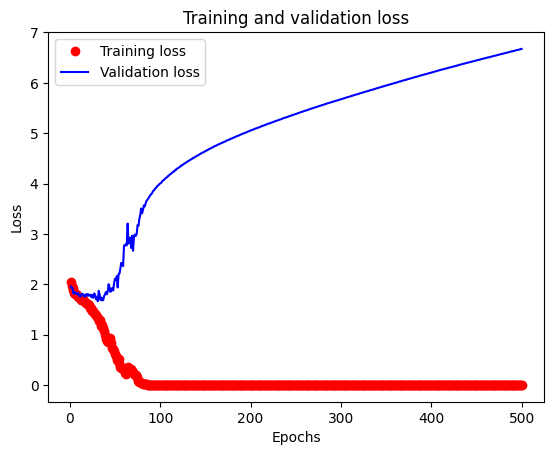

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

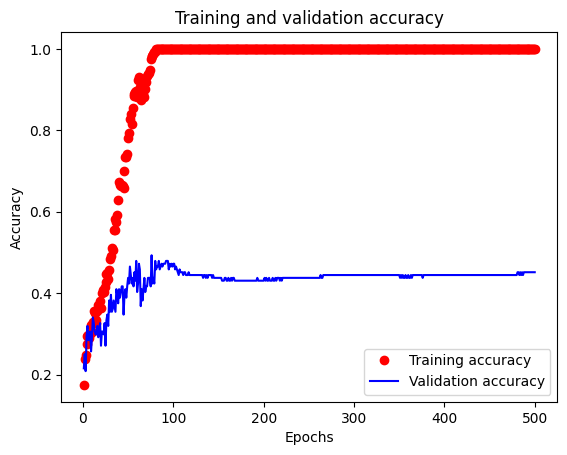

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show